In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [10]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
y_train.shape

(50000, 1)

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
y_test = y_test.reshape(-1,)

In [17]:
classes = [ 'airplane','automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [18]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

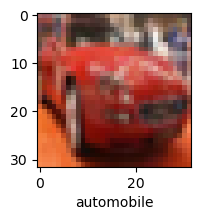

In [19]:
plot_sample(X_train, y_train, 5)

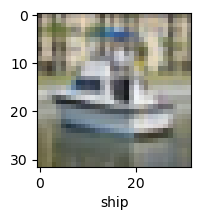

In [20]:
plot_sample(X_train, y_train, 501)

In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])

ann.compile(optimizer = 'SGD',
           loss='sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 110s 69ms/step - loss: 1.8121 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.6270 - accuracy: 0.4246
Epoch 3/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.5432 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.4834 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 112s 71ms/step - loss: 1.4349 - accuracy: 0.4957


In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 18ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.43      0.58      0.49      1000
           1       0.49      0.66      0.56      1000
           2       0.47      0.22      0.30      1000
           3       0.32      0.36      0.34      1000
           4       0.48      0.36      0.42      1000
           5       0.47      0.25      0.32      1000
           6       0.60      0.40      0.48      1000
           7       0.63      0.43      0.51      1000
           8       0.43      0.76      0.55      1000
           9       0.43      0.56      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.46      0.45     10000



In [24]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

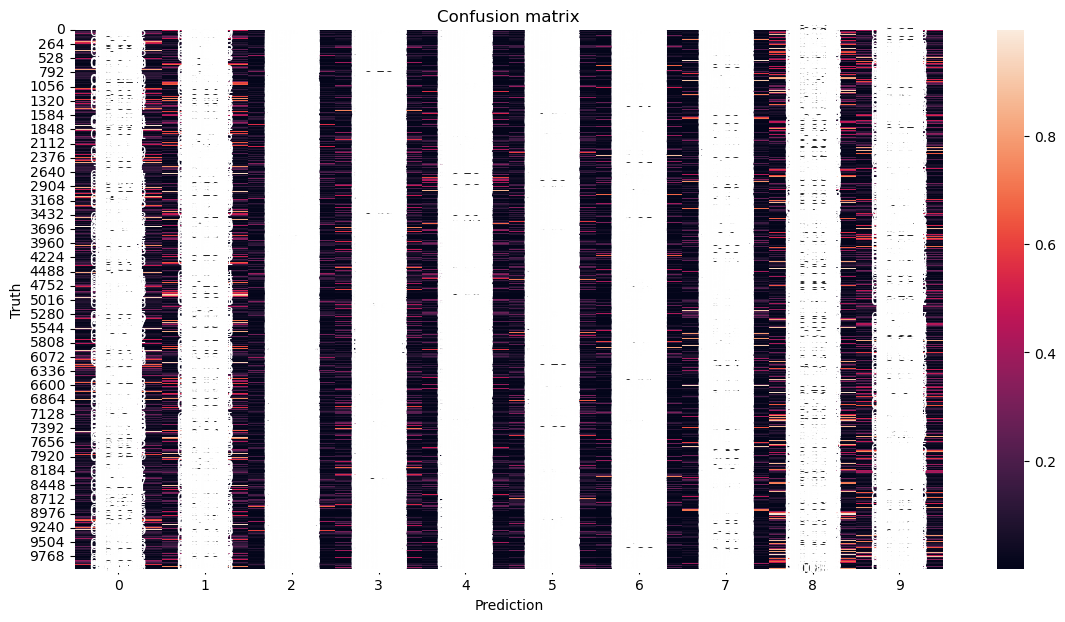

In [26]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [4]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
cnn.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [27]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 52s 32ms/step - loss: 1.4745 - accuracy: 0.4709
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1020 - accuracy: 0.6129
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9737 - accuracy: 0.6612
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8936 - accuracy: 0.6888
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8269 - accuracy: 0.7113
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7733 - accuracy: 0.7303
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7240 - accuracy: 0.7461
Epoch 8/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6867 - accuracy: 0.7587
Epoch 9/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6481 - accuracy: 0.7731
Epoch 10/10
1563/1563 [==============================] - 49s 31m

In [28]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9355 - accuracy: 0.6939


[0.9354508519172668, 0.6938999891281128]

In [29]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[3.1387661e-02, 8.6311297e-04, 1.3868165e-01, 2.0104077e-01,
        5.3561194e-04, 3.2932407e-01, 4.9250363e-04, 4.0906901e-03,
        2.8362724e-01, 9.9567017e-03],
       [4.7031141e-04, 5.7622418e-02, 9.7790064e-08, 3.5449521e-08,
        8.1392159e-08, 1.0578479e-09, 1.4787420e-09, 7.9172233e-09,
        9.4176060e-01, 1.4653167e-04],
       [4.5381907e-02, 9.8159395e-02, 1.2475486e-02, 4.2586154e-03,
        6.6196863e-03, 3.2083617e-04, 8.3092717e-04, 2.3908585e-03,
        5.8571494e-01, 2.4384736e-01],
       [6.8860185e-01, 2.3430654e-01, 9.1461474e-03, 5.4171303e-04,
        2.2332678e-03, 6.4335625e-05, 4.1384428e-05, 8.9219939e-05,
        6.1483614e-02, 3.4919896e-03],
       [9.7496104e-07, 7.9152887e-05, 6.1117411e-03, 2.2025434e-02,
        1.4051764e-01, 1.3632703e-03, 8.2976443e-01, 1.9179073e-05,
        7.9011632e-05, 3.9147362e-05]], dtype=float32)

In [31]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 6]

In [32]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

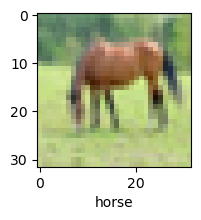

In [33]:
plot_sample(X_test, y_test, 60)

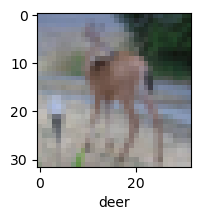

In [34]:
plot_sample(X_test, y_test, 100)

In [35]:
classes[y_classes[60]]

'horse'

In [36]:
classes[y_classes[4]]

'frog'